# Contents of the Notebook <a class="anchor" id="toc"></a>

* [ACTS table](#f1)
    * [Data Transformation](#f1.1)
    * [Overview of donations over the years](#f1.2)
    * [Difference between donations (DO) and automatic deductions (PA)](#f1.3)
    
* [CONTACTS table](#f2)
    * [Data Transformation](#f2.1)
    * [Recent donors](#f2.2)
    * [Evolution of PA and DO donors](#f2.3)
    * [Donors by Region](#f2.4)

* [ACTIONS table](#f3)

In [55]:
library(RMySQL)
library(ggplot2)
library(dplyr)
library(stringr)

options(repr.plot.width=8, repr.plot.height=2.5)

In [2]:
mydb = dbConnect(MySQL(), user='rym', password='', dbname='ma_charity_small', host='127.0.0.1', port=3306)
tables = dbListTables(mydb)
tables

[1] "actions"         "acts"            "assignment2"     "channels"       
[5] "contacts"        "payment_methods" "prefixes"

In [3]:
actions = fetch(dbSendQuery(mydb, "select * from actions"), n=-1)
acts = fetch(dbSendQuery(mydb, "select * from acts"), n=-1)
contacts = fetch(dbSendQuery(mydb, "select * from contacts"), n=-1)

Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 0 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 1 imported as numeric”Warning message in .local(conn, statement, ...):
“Decimal MySQL column 2 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 0 imported as numeric”Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 6 imported as numeric”

# ACTS table : donations and automatic deductions <a class="anchor" id="f1"></a>

## Data transformation <a class="anchor" id="f1.1"></a>

In [4]:
str(acts)

'data.frame':	310709 obs. of  9 variables:
 $ id               : num  1 22 44 106 107 117 132 141 251 278 ...
 $ contact_id       : num  0 70 90 110 110 120 130 140 150 160 ...
 $ amount           : num  40 2.29 3.81 3.81 7.62 3.81 6.1 2.29 3.81 6.86 ...
 $ act_date         : chr  "2006-12-16" "1995-06-28" "1995-06-30" "1995-07-06" ...
 $ act_type_id      : chr  "DO" "DO" "DO" "DO" ...
 $ payment_method_id: chr  "CH" "CH" "CH" "CH" ...
 $ channel_id       : chr  "MA" "MA" "MA" "MA" ...
 $ campaign_id      : chr  "C35" NA NA NA ...
 $ message_id       : chr  "C35-147" NA NA NA ...


In [5]:
acts$act_date = as.Date(acts$act_date)
acts$year = as.numeric(format(acts$act_date, format="%Y"))
acts$month = as.numeric(format(acts$act_date, format="%m"))
acts$act_type_id = factor(acts$act_type_id)
acts$payment_method_id = factor(acts$payment_method_id)
acts$channel_id = factor(acts$channel_id)
str(acts)

'data.frame':	310709 obs. of  11 variables:
 $ id               : num  1 22 44 106 107 117 132 141 251 278 ...
 $ contact_id       : num  0 70 90 110 110 120 130 140 150 160 ...
 $ amount           : num  40 2.29 3.81 3.81 7.62 3.81 6.1 2.29 3.81 6.86 ...
 $ act_date         : Date, format: "2006-12-16" "1995-06-28" ...
 $ act_type_id      : Factor w/ 2 levels "DO","PA": 1 1 1 1 1 1 1 1 1 1 ...
 $ payment_method_id: Factor w/ 6 levels "AU","CB","CH",..: 3 3 3 3 1 3 3 3 3 3 ...
 $ channel_id       : Factor w/ 2 levels "MA","WW": 1 1 1 1 1 1 1 1 1 1 ...
 $ campaign_id      : chr  "C35" NA NA NA ...
 $ message_id       : chr  "C35-147" NA NA NA ...
 $ year             : num  2006 1995 1995 1995 1999 ...
 $ month            : num  12 6 6 7 8 7 7 7 7 12 ...


In [6]:
acts %>% group_by(year, month) %>% 
        summarise(amount = sum(amount))

year,month,amount
1971,3,22.87
1991,12,955.07
1992,10,102.12
1992,11,53.35
1992,12,2791.60
1993,1,371.94
1993,2,99.08
1993,3,1200.69
1993,4,87.64
1993,5,15.24


Only one month for 1971 and 1991.

Only 3 months for 1992.

Only 6 months (January to June) for 2018.

## Overview of donations over the years <a class="anchor" id="f1.2"></a>

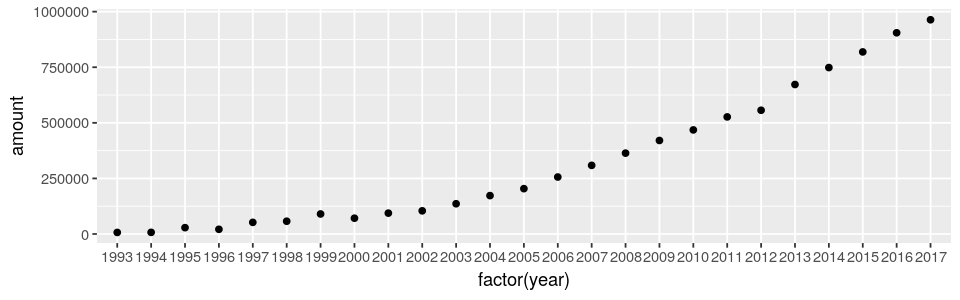

In [7]:
acts = acts %>% filter(year > 1992)
moneyPerYear = acts %>% 
              group_by(year) %>% 
              filter(year < 2018) %>%
              summarise(amount = sum(amount))

ggplot(data = moneyPerYear, aes(x = factor(year), y = amount)) + geom_point()

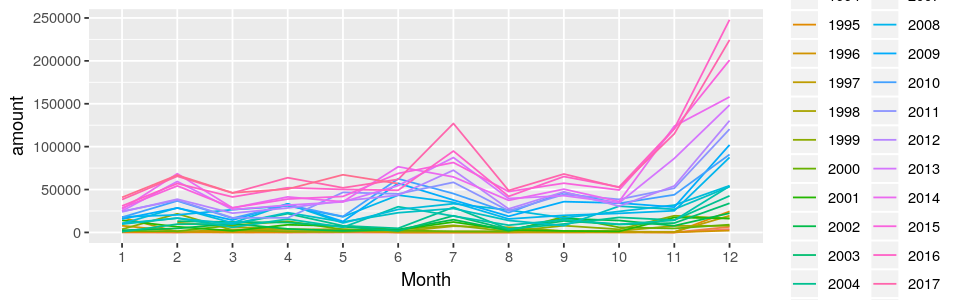

In [8]:
moneyPerMonth = acts %>% 
              group_by(year, month) %>% 
              summarise(amount = sum(amount))
ggplot(data = moneyPerMonth, aes(x = factor(month), y = amount))+
            geom_line(aes(color = factor(year), group=factor(year))) +
            xlab('Month') + labs(color = 'Year')

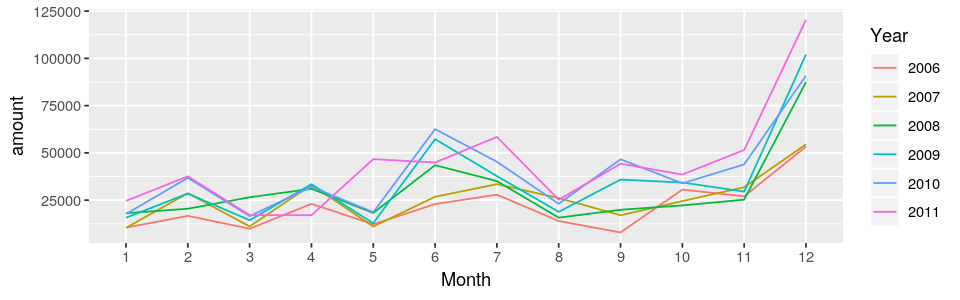

In [9]:
ggplot(data = moneyPerMonth %>% filter(year > 2005 & year < 2012), 
       aes(x = factor(month), y = amount))+
       geom_line(aes(color = factor(year), group = factor(year))) +
        xlab('Month') + labs(color = 'Year')

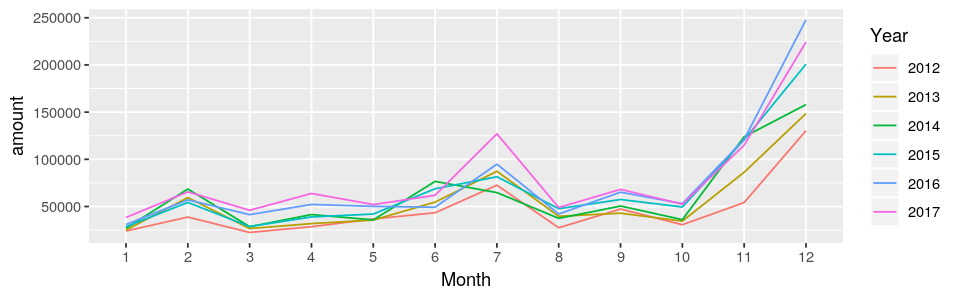

In [10]:
ggplot(data = moneyPerMonth %>% filter(year > 2011 & year < 2018), 
       aes(x = factor(month), y = amount))+
       geom_line(aes(color = factor(year), group = factor(year))) +
        xlab('Month') + labs(color = 'Year')

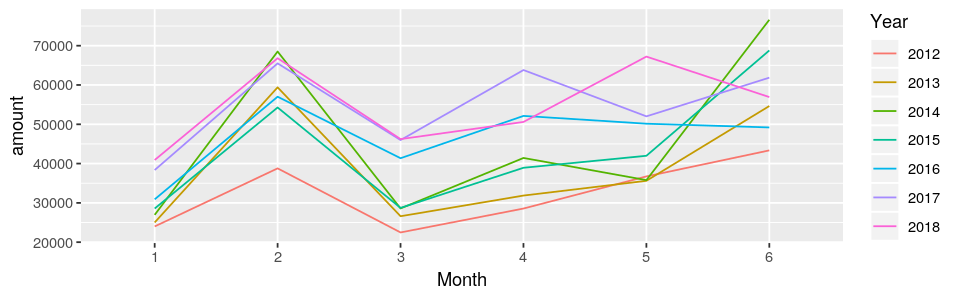

In [11]:
ggplot(data = moneyPerMonth %>% filter(year >= 2012 & month <= 6), 
       aes(x = factor(month), y = amount))+
       geom_line(aes(color = factor(year), group = factor(year))) +
        xlab('Month') + labs(color = 'Year')

Normally donations peak during June, but we see it's not the case for 2018. 

Why? No more ISF (tax)? June was not over yet when the data was retrieved?

## Difference between donations (DO) and automatic deductions (PA) <a class="anchor" id="f1.3"></a>

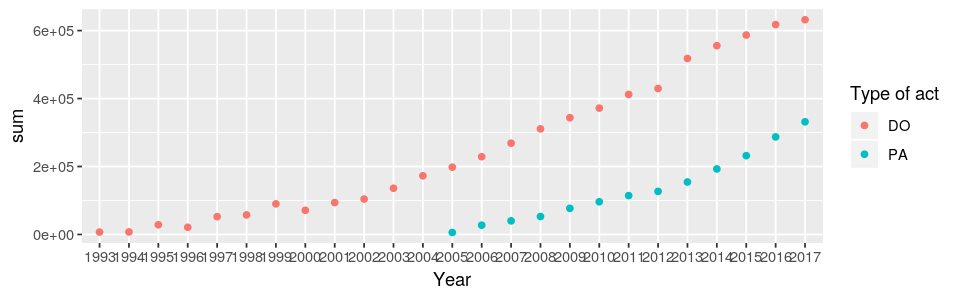

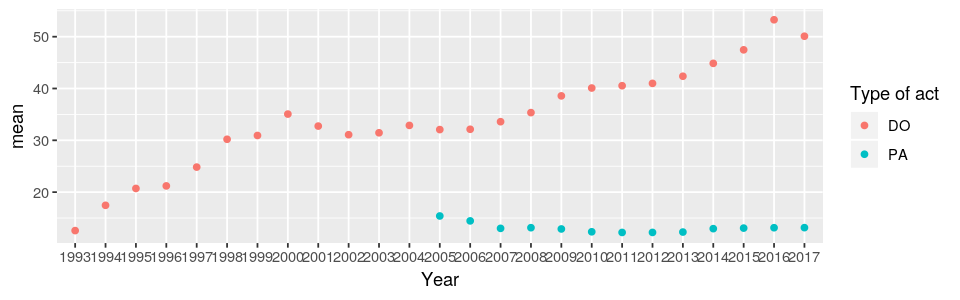

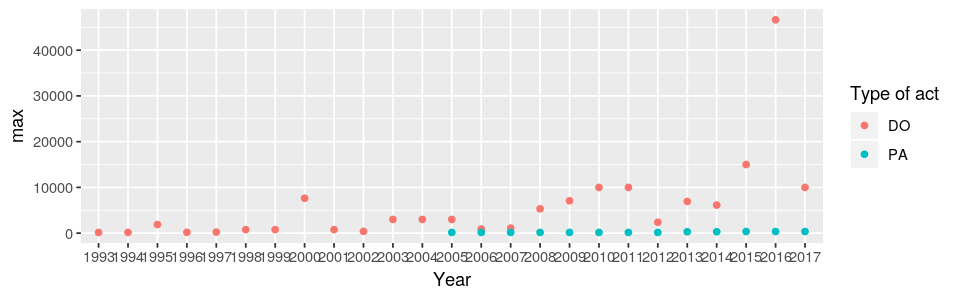

In [98]:
ggplot(data = acts %>% 
              group_by(year, act_type_id) %>% 
              filter(year < 2018) %>%
              summarise(amount = sum(amount)), 
       aes(x = factor(year), y = amount))+
       geom_point(aes(color = act_type_id)) +
        xlab('Year') + labs(color = 'Type of act')

There were no automatic deductions before 2005. 

Let's only study donations from 2005 onward.

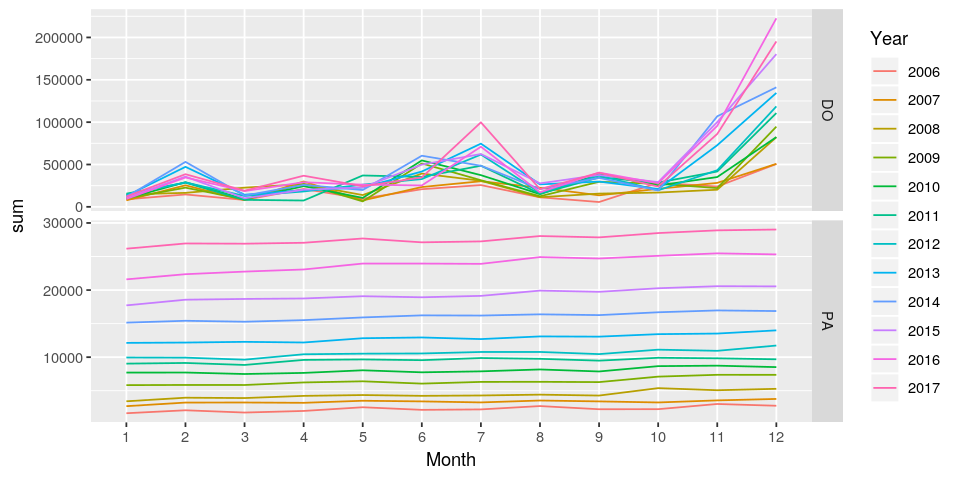

In [96]:
options(repr.plot.width=8, repr.plot.height=4)

amountPerActType = acts %>% 
        group_by(year, month, act_type_id) %>% 
        filter(year > 2005 & year < 2018) %>%
        summarise(sum = sum(amount))

ggplot(data = amountPerActType, aes(x = factor(month), y = sum))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     facet_grid(act_type_id ~ ., scales='free') +
        xlab('Month') + labs(color = 'Year')

options(repr.plot.width=8, repr.plot.height=2.5)

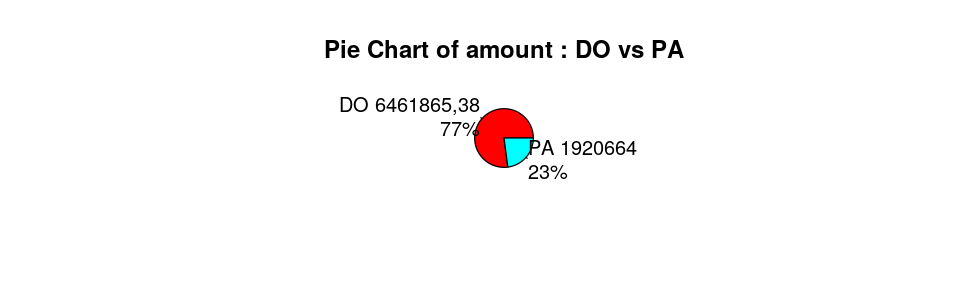

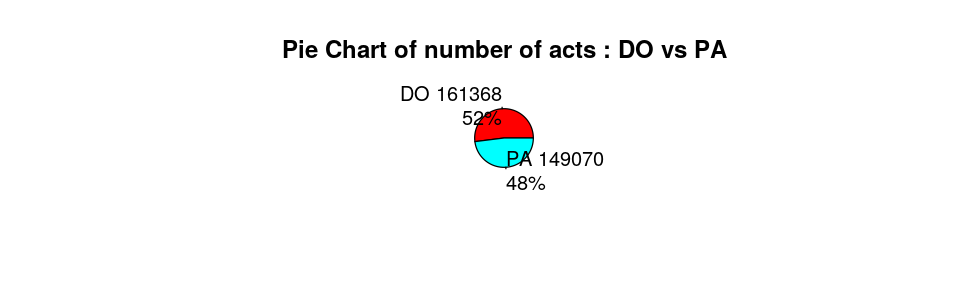

In [14]:
actsPerType = acts %>% 
    group_by(act_type_id) %>%
    summarise(amount = sum(amount), n = n()) 

slices <- c(actsPerType[[1,2]], actsPerType[[2,2]])
lbls <- c(as.character(actsPerType[[1,1]]), as.character(actsPerType[[2,1]]))
lbls <- paste(lbls, slices)
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct, sep="\n") 
lbls <- paste(lbls, "%", sep="")
pie(slices, labels = lbls, col=rainbow(length(lbls)), main="Pie Chart of amount : DO vs PA")

slices <- c(actsPerType[[1,3]], actsPerType[[2,3]])
lbls <- c(as.character(actsPerType[[1,1]]), as.character(actsPerType[[2,1]]))
lbls <- paste(lbls, slices)
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct, sep="\n") 
lbls <- paste(lbls, "%", sep="")
pie(slices, labels = lbls, col=rainbow(length(lbls)), main="Pie Chart of number of acts : DO vs PA")

There is almost as many donatioans as automatic deductions, but the amount spent on donations is much higher.

Is there a change of trend from 2005 to 2018?

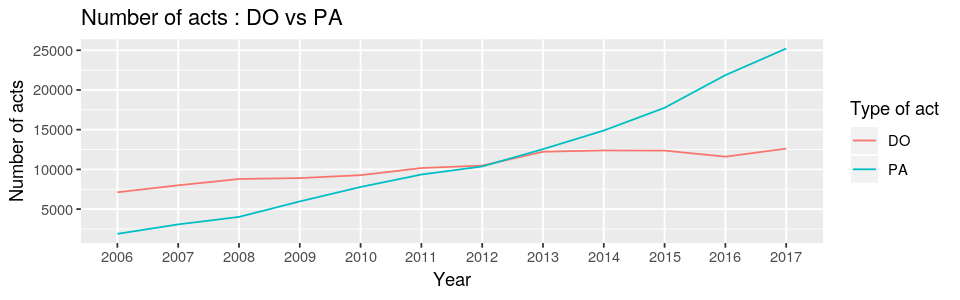

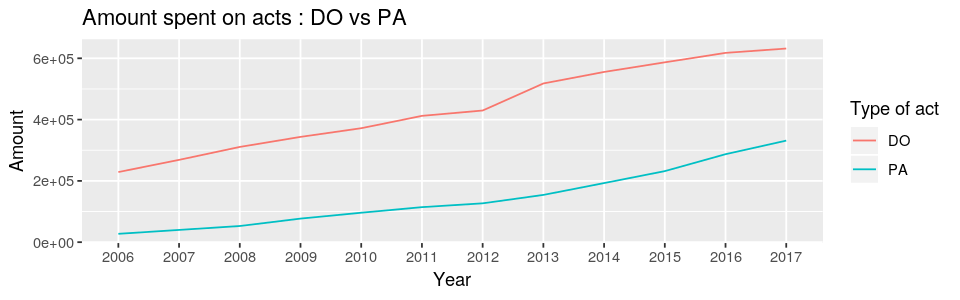

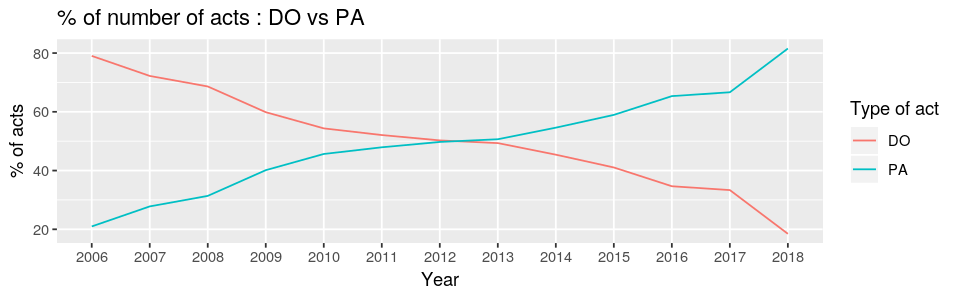

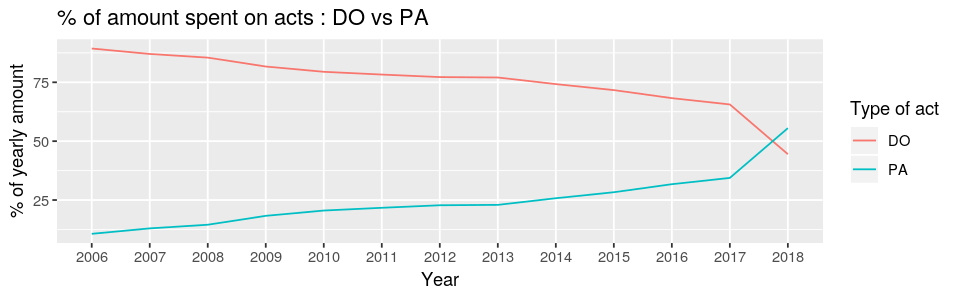

In [15]:
changeActType = acts %>% 
    group_by(year, act_type_id) %>%
    filter(year > 2005) %>%
    summarise(amount = sum(amount), n = n())

ggplot(data = changeActType %>% filter(year < 2018), 
    aes(x = factor(year), y = n))+
    geom_line(aes(color = act_type_id, group = act_type_id)) +
    ggtitle('Number of acts : DO vs PA') +
    xlab('Year') + ylab('Number of acts') + labs(color = 'Type of act')

ggplot(data = changeActType %>% filter(year < 2018), 
    aes(x = factor(year), y = amount))+
    geom_line(aes(color = act_type_id, group = act_type_id)) +
    ggtitle('Amount spent on acts : DO vs PA') +
    xlab('Year') + ylab('Amount') + labs(color = 'Type of act')

ggplot(data = changeActType %>%
    mutate(freq_n = 100*n / sum(n)), 
    aes(x = factor(year), y = freq_n))+
    geom_line(aes(color = act_type_id, group = act_type_id)) +
    ggtitle('% of number of acts : DO vs PA') +
    xlab('Year') + ylab('% of acts') + labs(color = 'Type of act')

ggplot(data = changeActType %>%
    mutate(freq_amount = 100*amount / sum(amount)), 
    aes(x = factor(year), y = freq_amount))+
    geom_line(aes(color = act_type_id, group = act_type_id)) +
    ggtitle('% of amount spent on acts : DO vs PA') +
    xlab('Year') + ylab('% of yearly amount') + labs(color = 'Type of act')

# CONTACTS tables : contacts and donors <a class="anchor" id="f2"></a>

## Data Transformation <a class="anchor" id="f2.1"></a>

In [16]:
str(contacts)

'data.frame':	74615 obs. of  7 variables:
 $ id              : num  70 90 110 120 130 140 150 160 170 190 ...
 $ prefix_id       : chr  "MME" "MME" "MR" "MME" ...
 $ first_name_clean: chr  "MURIELLE" "EMILIE" "GERARD" "MARIE" ...
 $ zip_code        : chr  "73160" "45410" "62138" "76520" ...
 $ town_clean      : chr  "COGNIN" "SOUGY" "DOUVRIN" "FRANQUEVILLE-SAINT-PIERRE" ...
 $ code_geo        : chr  "73087" "45313" "62276" "76475" ...
 $ active          : num  1 1 1 1 1 1 1 1 1 1 ...


In [44]:
contacts$active = factor(contacts$active)
contacts$prefix_id = factor(contacts$prefix_id)
contacts$region = substr(contacts$zip_code, 1, 2)
str(contacts)

'data.frame':	74615 obs. of  8 variables:
 $ id              : num  70 90 110 120 130 140 150 160 170 190 ...
 $ prefix_id       : Factor w/ 7 levels "AU","DR","MLLE",..: 4 4 6 4 6 6 4 4 6 4 ...
 $ first_name_clean: chr  "MURIELLE" "EMILIE" "GERARD" "MARIE" ...
 $ zip_code        : chr  "73160" "45410" "62138" "76520" ...
 $ town_clean      : chr  "COGNIN" "SOUGY" "DOUVRIN" "FRANQUEVILLE-SAINT-PIERRE" ...
 $ code_geo        : chr  "73087" "45313" "62276" "76475" ...
 $ active          : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ region          : chr  "73" "45" "62" "76" ...


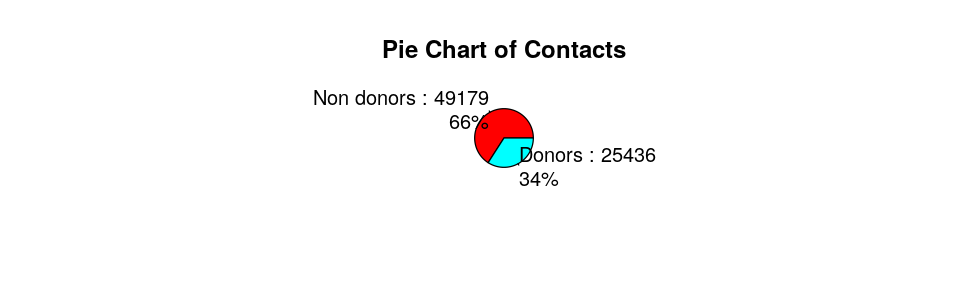

In [45]:
donors_acts = inner_join(contacts, acts, by = c("id" = "contact_id"))
nb_donors = (donors_acts %>% group_by(id) %>% summarise() %>% count())$n

slices <- c((contacts %>% anti_join(acts, by = c("id" = "contact_id")) %>% count())$n, 
            nb_donors)
lbls <- c("Non donors :", "Donors :")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, slices) 
lbls <- paste(lbls, pct, sep="\n")
lbls <- paste(lbls, "%", sep="") 
pie(slices, labels = lbls, col=rainbow(length(lbls)), main="Pie Chart of Contacts")

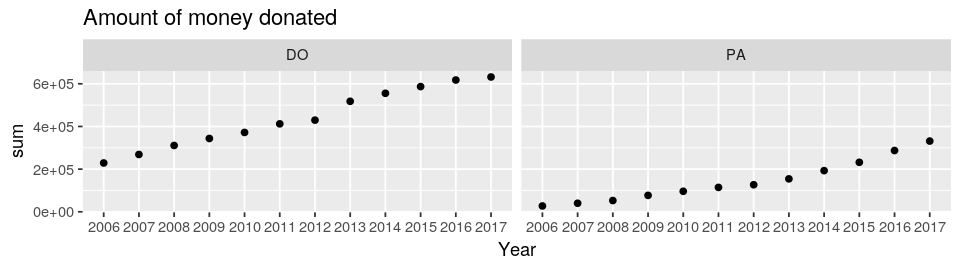

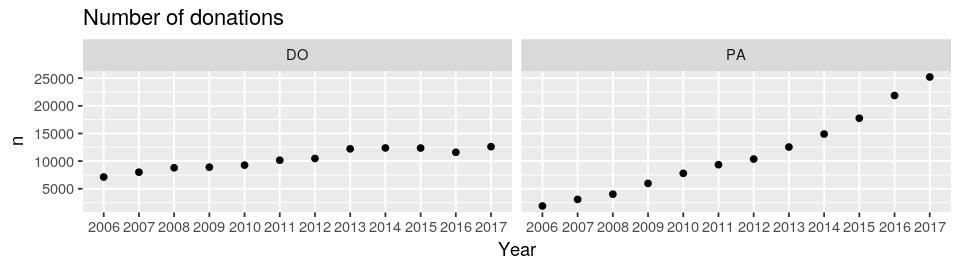

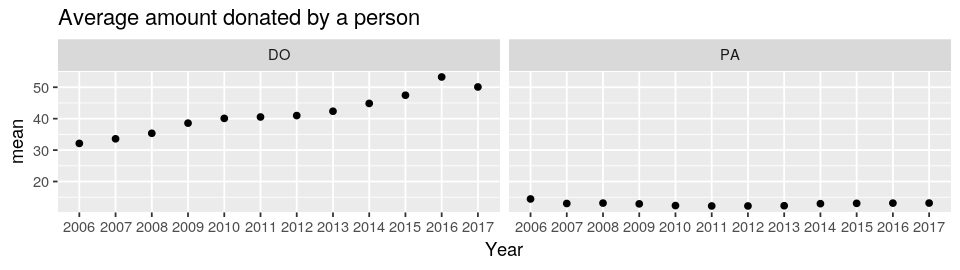

In [140]:
donationsPerPerson = donors_acts %>% 
    filter(year > 2005 & year < 2018) %>%
    group_by(year, act_type_id) %>%
    summarise(sum = sum(amount), mean = mean(amount), n=n())

ggplot(data = donationsPerPerson, 
       aes(x = factor(year), y = sum, group = factor(year)))+
    geom_point() +
    facet_grid(. ~ act_type_id) +
    ggtitle('Amount of money donated') +
    xlab('Year')

ggplot(data = donationsPerPerson, 
       aes(x = factor(year), y = n, group = factor(year)))+
    geom_point() +
    facet_grid(. ~ act_type_id) +
    ggtitle('Number of donations') +
    xlab('Year')

ggplot(data = donationsPerPerson, 
       aes(x = factor(year), y = mean, group = factor(year)))+
    geom_point() +
    facet_grid(. ~ act_type_id) +
    ggtitle('Average amount donated by a person') +
    xlab('Year')

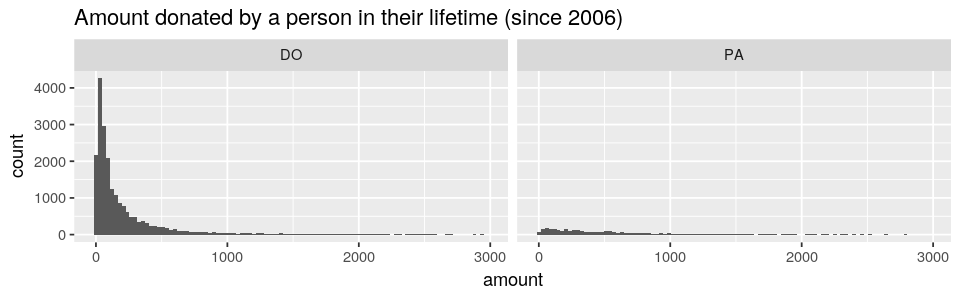

In [47]:
ggplot(data = donors_acts %>% 
                filter(year >= 2006) %>%
                group_by(id, act_type_id) %>% 
                summarise(amount = sum(amount)) %>%
                filter(amount < 3000), 
       aes(x = amount)) +
       geom_histogram(binwidth = 30) +
       facet_grid(. ~ act_type_id) +
       ggtitle('Amount donated by a person in their lifetime (since 2006)')

## Recent donors <a class="anchor" id="f2.2"></a>

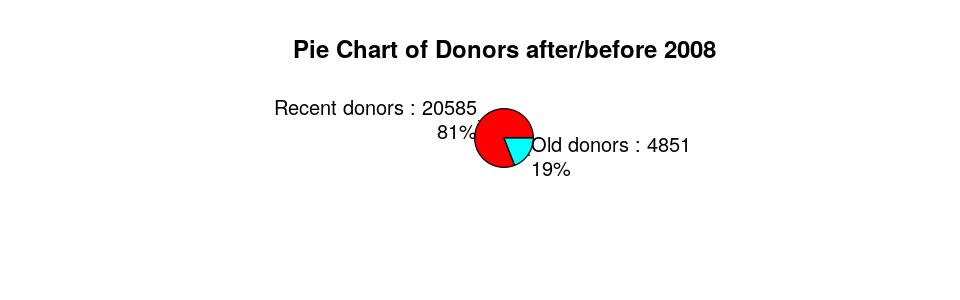

In [78]:
recent = 2008

recent_donors_acts = inner_join(contacts, acts %>% filter(year >= recent), 
                                   by = c("id" = "contact_id"))

slices <- c((recent_donors_acts %>% group_by(id) %>% summarise() %>% count())$n, 
            nb_donors - (recent_donors_acts %>% group_by(id) %>% summarise() %>% count())$n)
lbls <- c("Recent donors :", "Old donors :")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, slices)
lbls <- paste(lbls, pct, sep="\n")
lbls <- paste(lbls, "%", sep="") 
pie(slices, labels = lbls, col=rainbow(length(lbls)), 
    main=paste("Pie Chart of Donors after/before", recent))

In [79]:
100*nrow(recent_donors_acts %>% filter(active == 1))/nrow(recent_donors_acts)

[1] 93,08206

## Evolution of PA and DO donors <a class="anchor" id="f2.3"></a>

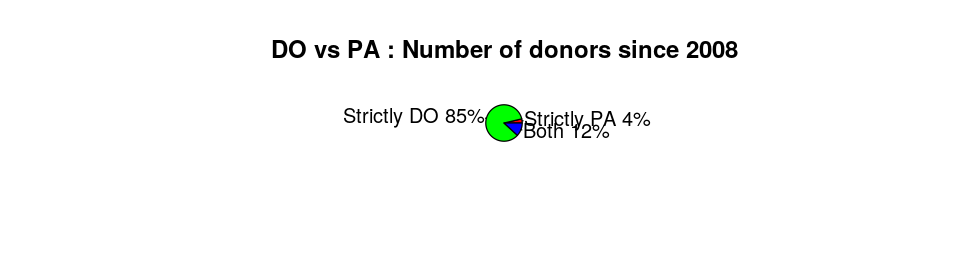

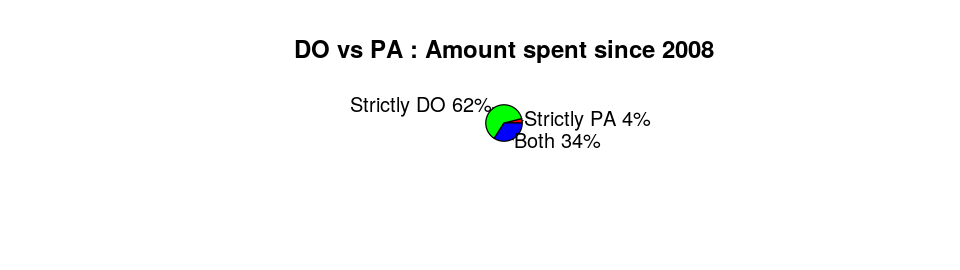

In [141]:
pa_donors_acts = recent_donors_acts %>% 
    filter(act_type_id == 'PA')
do_donors_acts = recent_donors_acts %>% 
    filter(act_type_id == 'DO')

pa_donors = pa_donors_acts %>% 
    anti_join(do_donors_acts, by="id")
do_donors = do_donors_acts %>% 
    anti_join(pa_donors_acts, by="id")
both_donors = rbind(pa_donors_acts %>% 
                        semi_join(do_donors_acts, by="id"),
                    do_donors_acts %>%
                        semi_join(pa_donors_acts, by='id'))

slices <- c((pa_donors %>% group_by(id) %>% summarise() %>% count())$n, 
            (do_donors %>% group_by(id) %>% summarise() %>% count())$n, 
            (both_donors %>% group_by(id) %>% summarise() %>% count())$n)
lbls <- c('Strictly PA', 'Strictly DO', 'Both')
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) 
lbls <- paste(lbls, "%", sep="")
pie(slices, labels = lbls, col=rainbow(length(lbls)), 
    main = paste("DO vs PA : Number of donors since", recent))

slices <- c((pa_donors %>% 
                 summarise(amount = sum(amount)))$amount, 
            (do_donors %>% 
                 summarise(amount = sum(amount)))$amount,
            (both_donors %>% 
                 summarise(amount = sum(amount)))$amount)
lbls <- c('Strictly PA', 'Strictly DO', 'Both')
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) 
lbls <- paste(lbls, "%", sep="")
pie(slices, labels = lbls, col=rainbow(length(lbls)), 
    main = paste("DO vs PA : Amount spent since", recent))

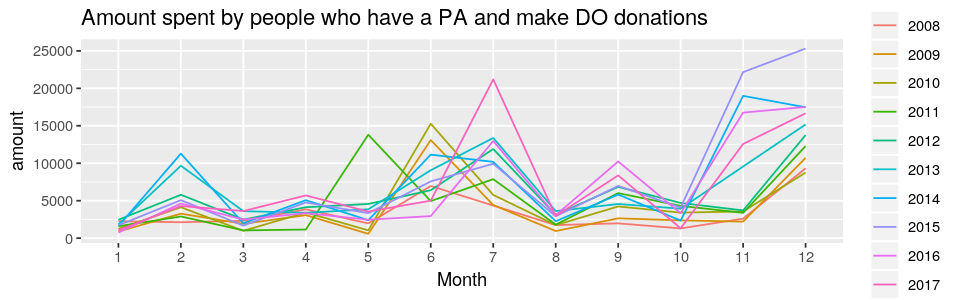

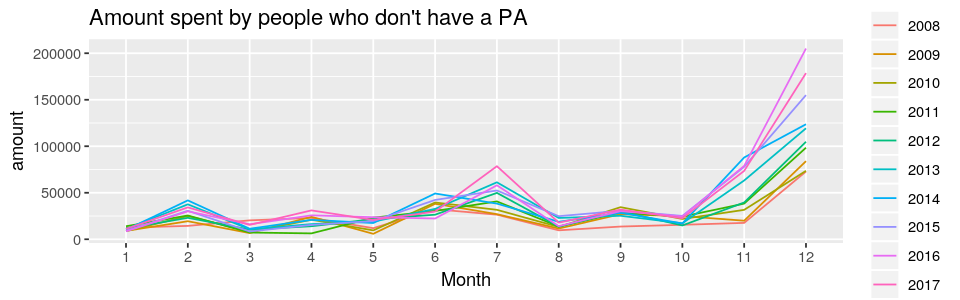

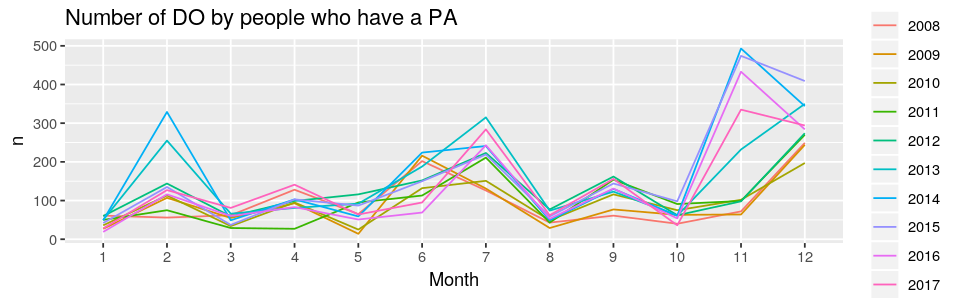

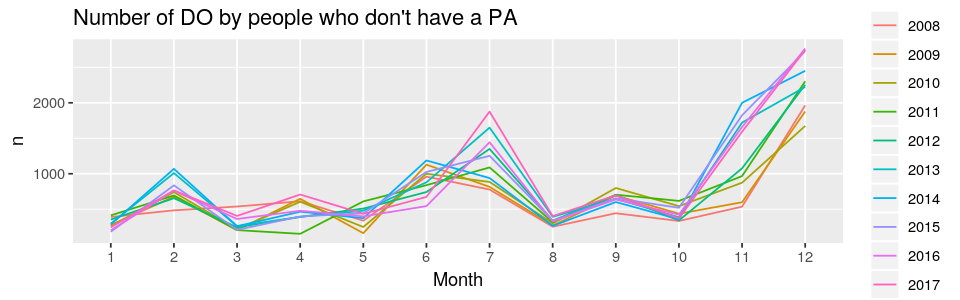

In [81]:
bilan_both = both_donors %>% 
          filter(year < 2018 & act_type_id == 'DO') %>%
          group_by(year, month) %>%
          summarise(amount = sum(amount), n=n())

bilan_do = do_donors %>% 
          filter(year < 2018) %>%
          group_by(year, month) %>%
          summarise(amount = sum(amount), n=n())

ggplot(data = bilan_both, aes(x = factor(month), y = amount))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     ggtitle('Amount spent by people who have a PA and make DO donations') +
     xlab('Month') + labs(color = 'Year')

ggplot(data = bilan_do, aes(x = factor(month), y = amount))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     ggtitle('Amount spent by people who don\'t have a PA') +
     xlab('Month') + labs(color = 'Year')

ggplot(data = bilan_both, aes(x = factor(month), y = n))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     ggtitle('Number of DO by people who have a PA') +
     xlab('Month') + labs(color = 'Year') 

ggplot(data = bilan_do, aes(x = factor(month), y = n))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     ggtitle('Number of DO by people who don\'t have a PA') +
     xlab('Month') + labs(color = 'Year')

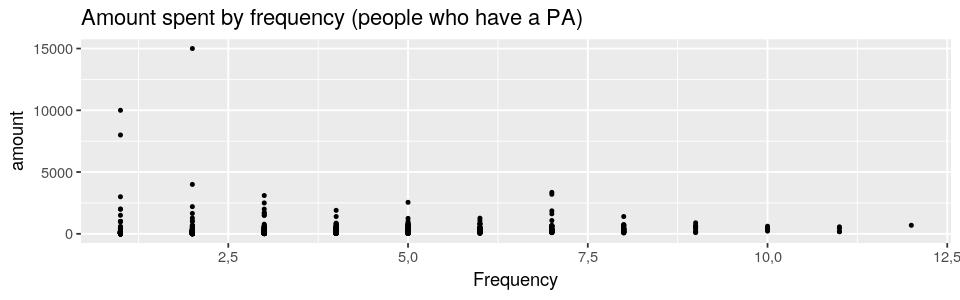

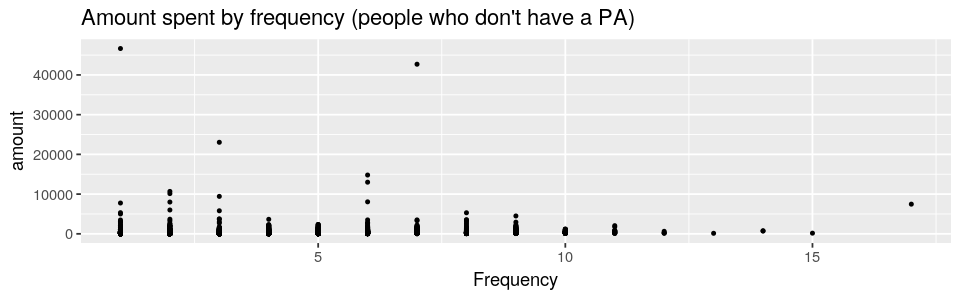

In [82]:
ggplot(data = both_donors %>% 
          filter(act_type_id == 'DO') %>%
          group_by(month, id) %>%
          summarise(amount = sum(amount), n = n()), 
       aes(x = n, y = amount))+
     geom_point(size = 0.75) +
     ggtitle('Amount spent by frequency (people who have a PA)') +
     xlab('Frequency') 

ggplot(data = do_donors %>% 
       group_by(month, id) %>%
          summarise(amount = sum(amount), n = n()), 
       aes(x = n, y = amount))+
     geom_point(size = 0.75) +
     ggtitle('Amount spent by frequency (people who don\'t have a PA)') +
     xlab('Frequency') 

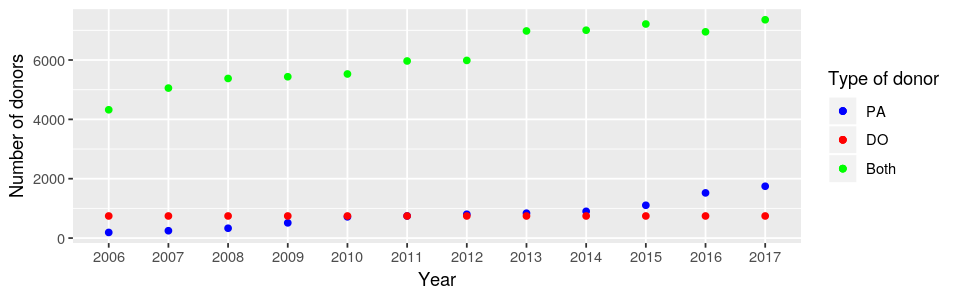

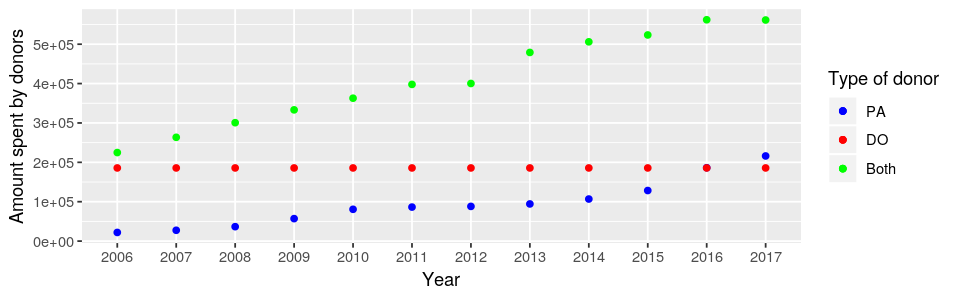

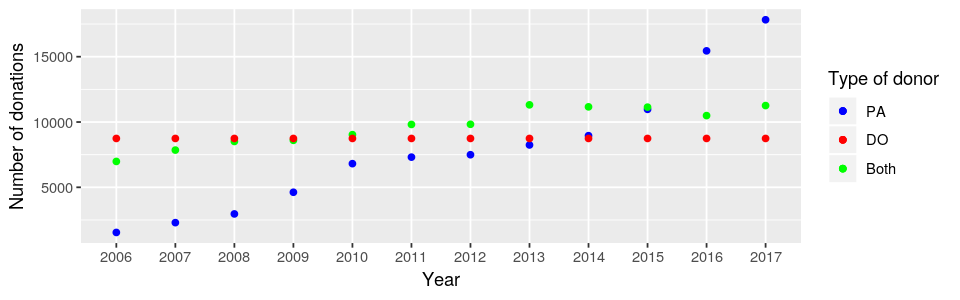

In [83]:
interval = 2006:2017

# Number of donors who made ONLY PA acts in a certain year
nb_pa_donors = vector(length = length(interval))
# Number of donors who made ONLY DO acts in a certain year 
nb_do_donors = vector(length = length(interval))
# Number of donors who made both types acts in a certain year 
nb_both_donors = vector(length = length(interval))

amount_pa_donors = vector(length = length(interval))
amount_do_donors = vector(length = length(interval))
amount_both_donors = vector(length = length(interval))

acts_pa_donors = vector(length = length(interval))
acts_do_donors = vector(length = length(interval))
acts_both_donors = vector(length = length(interval))

i = 1
for(y in interval) {
    recent_donors_acts_y = inner_join(contacts, acts %>% filter(year == y), 
                                   by = c("id" = "contact_id"))
    
    # Donors who make PA acts, but could also make DO ones
    pa_donors_acts_y = recent_donors_acts_y %>% 
        filter(act_type_id == 'PA')
    # Donors who make DO acts, but could also make PA ones
    do_donors_acts_y = recent_donors_acts_y %>% 
        filter(act_type_id == 'DO')
    
    nb_pa_donors[i] = (pa_donors_acts_y %>% 
        anti_join(do_donors_acts_y, by="id") %>%
        group_by(id) %>% summarise() %>%
        count())$n
    nb_do_donors[i] = (do_donors_acts_y %>% 
        anti_join(pa_donors_acts_y, by="id") %>%
        group_by(id) %>% summarise() %>%
        count())$n
    nb_both_donors = (pa_donors_acts_y %>% 
        semi_join(do_donors_acts_y, by="id") %>%
        group_by(id) %>% summarise() %>%
        count())$n
    
    # PA acts of contacts who used both PA and DO
    pa_do = pa_donors_acts_y %>% 
        semi_join(do_donors_acts_y, by="id")
    # DO acts of contacts who used both PA and DO
    do_pa = do_donors_acts_y %>% 
        semi_join(pa_donors_acts_y, by="id")
    
    amount_pa_donors[i] = (pa_donors_acts_y %>% 
        anti_join(do_donors_acts_y, by="id") %>%
        group_by(year) %>%
        summarise(amount = sum(amount)))$amount
    amount_do_donors[i] = (do_donors_acts_y %>% 
        anti_join(pa_donors_acts_y, by="id") %>%
        summarise(amount = sum(amount)))$amount
    amount_both_donors = (rbind(pa_do, do_pa) %>%
        summarise(amount = sum(amount)))$amount
    
    acts_pa_donors[i] = (pa_donors_acts_y %>% 
        anti_join(do_donors_acts_y, by="id") %>%
        count())$n
    acts_do_donors[i] = (do_donors_acts_y %>% 
        anti_join(pa_donors_acts_y, by="id") %>%
        count())$n
    acts_both_donors = (rbind(pa_do, do_pa) %>%
        count())$n
    
    i = i + 1
}

donors = data.frame(year = interval, 
            nb_pa = nb_pa_donors, nb_do = nb_do_donors, nb_both = nb_both_donors,
            amount_pa = amount_pa_donors, amount_do = amount_do_donors, amount_both = amount_both_donors,
            acts_pa = acts_pa_donors, acts_do = acts_do_donors, acts_both = acts_both_donors)

ggplot(data = donors, aes(group = factor(year))) + 
    geom_point(aes(x = factor(year), y = nb_pa, color = 'blue')) +
    geom_point(aes(x = factor(year), y = nb_do, color = 'red')) +
    geom_point(aes(x = factor(year), y = nb_both, color = 'green')) +
    xlab('Year') + ylab('Number of donors') +
    labs(color = 'Type of donor') + 
    scale_color_manual(labels = c("PA", "DO", "Both"), values = c("blue", "red", "green"))

ggplot(data = donors, aes(group = factor(year))) + 
    geom_point(aes(x = factor(year), y = amount_pa, color = 'blue')) +
    geom_point(aes(x = factor(year), y = amount_do, color = 'red')) +
    geom_point(aes(x = factor(year), y = amount_both, color = 'green')) +
    xlab('Year') + ylab('Amount spent by donors') +
    labs(color = 'Type of donor') + 
    scale_color_manual(labels = c("PA", "DO", "Both"), values = c("blue", "red", "green"))

ggplot(data = donors, aes(group = factor(year))) + 
    geom_point(aes(x = factor(year), y = acts_pa, color = 'blue')) +
    geom_point(aes(x = factor(year), y = acts_do, color = 'red')) +
    geom_point(aes(x = factor(year), y = acts_both, color = 'green')) +
    xlab('Year') + ylab('Number of donations') +
    labs(color = 'Type of donor') + 
    scale_color_manual(labels = c("PA", "DO", "Both"), values = c("blue", "red", "green"))

## Donors by Region <a class="anchor" id="f2.4"></a>

In [100]:
table(recent_donors_acts$region)


   00    01    02    03    04    05    06    07    08    09    10    11    12 
   31  2099  1959  1468   924   328  7412   968   697   205  1529  1230   880 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
 7829  2659   621  1386  2264  1593   688   916  2382  1478   667  2177  2035 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
 1819  2175  2444  3095  2751  4485  1002  6337  5274  2100   941  3183  3736 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
  674  1615  1592  2116   437  5075  2808   697   994   235  2477  1095  2404 
   52    53    54    55    56    57    58    59    6     60    61    62    63 
  783   477  2946   594  2608  3669  1201 10022     1  4040   742  4491  2767 
   64    65    66    67    68    69    70    71    72    73    74    75    76 
 1758   815  2207  4417  2881  6292   793  2545  1969  1949  4001 11292  4875 
   77    78    79    80    81    82    83    84    

In [117]:
recent_donors_acts$france = as.numeric(recent_donors_acts$region < 'A')
recent_donors_acts$france[is.na(recent_donors_acts$france)] = 0
recent_donors_acts$france = factor(recent_donors_acts$france)
table(recent_donors_acts$france)


     0      1 
    98 255585 

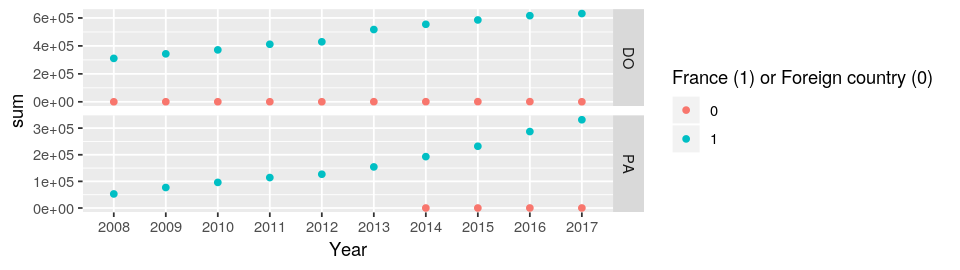

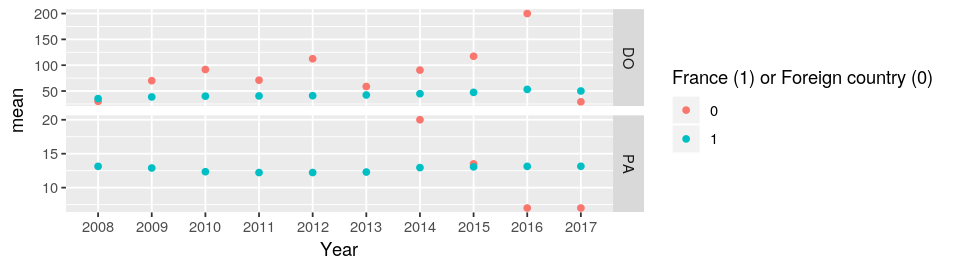

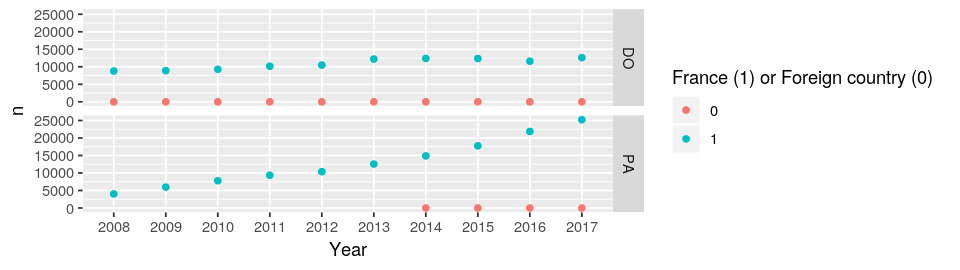

In [134]:
data = recent_donors_acts %>% 
       filter(year < 2018) %>%
    group_by(year, act_type_id, france) %>%
    summarise(sum = sum(amount), mean = mean(amount), n = n())

ggplot(data = data, 
       aes(x = factor(year), y = sum))+
     geom_point(aes(color = france)) +
     facet_grid(act_type_id ~ ., scales='free') +
        xlab('Year') + labs(color = 'France (1) or Foreign country (0)')

ggplot(data = data, 
       aes(x = factor(year), y = mean))+
     geom_point(aes(color = france)) +
     facet_grid(act_type_id ~ ., scales='free') +
        xlab('Year') + labs(color = 'France (1) or Foreign country (0)')

ggplot(data = data, 
       aes(x = factor(year), y = n))+
     geom_point(aes(color = france)) +
     facet_grid(act_type_id ~ .) +
        xlab('Year') + labs(color = 'France (1) or Foreign country (0)')

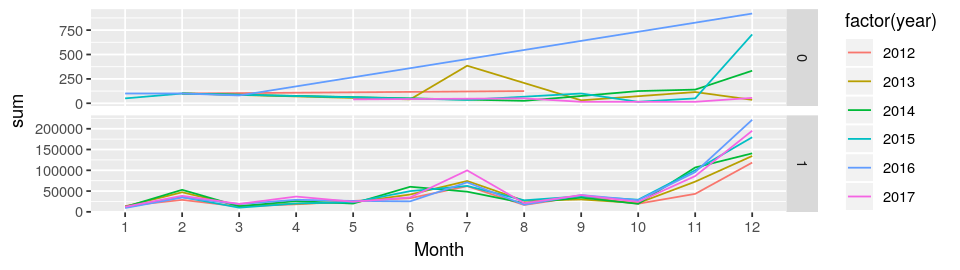

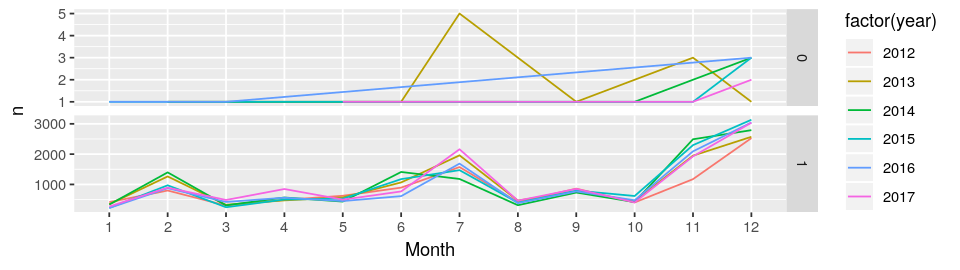

In [139]:
data = recent_donors_acts %>% 
          filter(act_type_id == 'DO' & year < 2018 & year >= 2012) %>%
          group_by(year, month, france) %>%
          summarise(sum = sum(amount), n = n())

ggplot(data = data, 
     aes(x = factor(month), y = sum))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     facet_grid(france ~ ., scales='free') + 
     xlab('Month') + labs(colors = 'Year')

ggplot(data = data, 
     aes(x = factor(month), y = n))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     facet_grid(france ~ ., scales='free') + 
     xlab('Month') + labs(color = 'Year')

In [ ]:
data = recent_donors_acts %>% 
          filter(act_type_id == 'DO' & year < 2018 & year >= 2012) %>%
          group_by(year, month, france) %>%
          summarise(sum = sum(amount), mean = mean(amount), n = n())

ggplot(data = data, 
     aes(x = factor(month), y = sum))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     facet_grid(france ~ ., scales='free') + 
     xlab('Month') + labs(colors = 'Year')

ggplot(data = data, 
     aes(x = factor(month), y = n))+
     geom_line(aes(color = factor(year), group = factor(year))) +
     facet_grid(france ~ ., scales='free') + 
     xlab('Month') + labs(color = 'Year')

# ACTIONS table : the charity's actions <a class="anchor" id="f3"></a>

In [26]:
str(actions)

'data.frame':	677177 obs. of  5 variables:
 $ id         : int  509 510 511 512 513 514 515 516 517 518 ...
 $ contact_id : int  160 160 160 160 160 160 160 160 160 160 ...
 $ campaign_id: chr  "C28" "C75" "C73" "C30" ...
 $ message_id : chr  "C28-18" "C75-18" "C73-10" "C30-4" ...
 $ action_date: chr  "2009-05-14" "2009-07-28" "2009-09-23" "2009-10-28" ...


In [27]:
actions$action_date = as.Date(actions$action_date)
#actions$year = as.numeric(format(actions$action_date, format="%Y"))
#actions$month = as.numeric(format(actions$action_date, format="%m"))

In [28]:
triple_join = fetch(dbSendQuery(mydb, "SELECT a.action_date, d.contact_id, d.act_date, d.amount, d.act_type_id 
FROM acts AS d
INNER JOIN contacts AS c ON c.id = d.contact_id
INNER JOIN actions AS a ON a.contact_id = d.contact_id"), n=-1)

Warning message in .local(conn, statement, ...):
“Unsigned INTEGER in col 1 imported as numeric”Warning message in .local(conn, statement, ...):
“Decimal MySQL column 3 imported as numeric”